# Практична робота №8
### Студента групи МІТ-31
### Переверзева Олексія

Розархівуємо набір даних

In [1]:
import zipfile
import os

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
main_dir="10_food_classes_all_data"

food_list = os.listdir("10_food_classes_all_data/train")
food_list.sort()
print(food_list)

# Папки та архів додано у gitignore

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


#### 1. Вибір Класів для Класифікації

16 у списку, тому 6 для першого класу, тобто *ice_cream*, 7 для другого - *pizza*

In [2]:
classes=['ice_cream', 'pizza']

#### 2. Попередня Обробка Даних

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Створимо генератори для тестового та тренувального набору даних
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [4]:
# Директорії тренувальних та тестових наборів
train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Імпортуємо дані з каталогів і перетворіть їх на партії

#Тренувальний набір
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # К-ть зображень для обробки одночасно
                                               target_size=(224, 224), # Перетворіимо усі зображення в 224 х 224
                                               class_mode="binary",
                                               subset='training',
                                               classes=classes,
                                               seed=13)

# Тестовий набір
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               classes=classes,
                                               seed=13)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#### 3. Розробка Моделі CNN

In [5]:
from tensorflow .keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(filters=10, 
            kernel_size=3,  # або (3, 3)
            activation="relu", 
            input_shape=(224, 224, 3)),  # Перший шар визначає форму введення (висота, ширина, колірні канали)
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,  # або (2, 2)
            padding="valid"),  # або 'same'
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation="sigmoid")  # Активація двійкового виходу
])

model.compile(loss="binary_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

#### 4. Тренування та Оцінка Моделі

In [6]:
results = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/10


47/47 [==============================] - 75s 1s/step - loss: 0.5832 - accuracy: 0.6800 - val_loss: 0.6312 - val_accuracy: 0.6620
Epoch 2/10
47/47 [==============================] - 28s 603ms/step - loss: 0.5366 - accuracy: 0.7307 - val_loss: 0.5055 - val_accuracy: 0.7420
Epoch 3/10
47/47 [==============================] - 43s 914ms/step - loss: 0.4915 - accuracy: 0.7660 - val_loss: 0.4661 - val_accuracy: 0.7860
Epoch 4/10
47/47 [==============================] - 25s 526ms/step - loss: 0.4561 - accuracy: 0.7960 - val_loss: 0.4139 - val_accuracy: 0.8360
Epoch 5/10
47/47 [==============================] - 26s 546ms/step - loss: 0.4287 - accuracy: 0.8047 - val_loss: 0.3773 - val_accuracy: 0.8320
Epoch 6/10
47/47 [==============================] - 26s 545ms/step - loss: 0.4131 - accuracy: 0.8200 - val_loss: 0.3864 - val_accuracy: 0.8200
Epoch 7/10
47/47 [==============================] - 24s 513ms/step - loss: 0.3777 - accuracy: 0.8280 - val_loss: 0.3319 - val_accuracy: 0.8880


Оцінка моделі: 
16/16 [==============================] - 2s 127ms/step - loss: 0.2585 - accuracy: 0.8940


<Axes: title={'center': 'Історія моделі'}, xlabel='Епохи', ylabel='Втрати/Точність'>

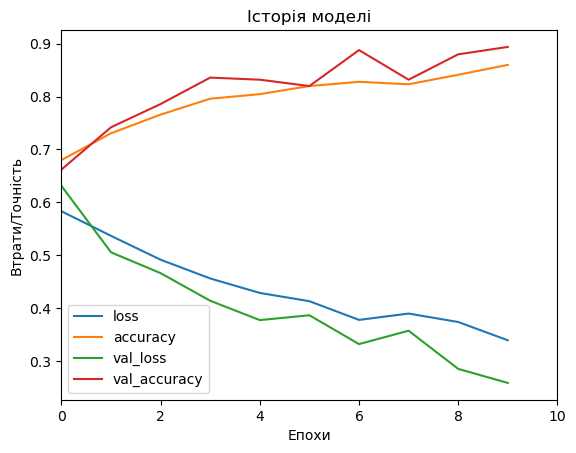

In [8]:
print("Оцінка моделі: ")
test_loss, test_accuracy= model.evaluate(test_data)

import pandas as pd
pd.DataFrame(results.history).plot(xlabel="Епохи",
ylabel="Втрати/Точність",title="Історія моделі", xlim=(0,10))